In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# function show image
def display(img, cmap=None):
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap='gray')

## draw contours around the coin

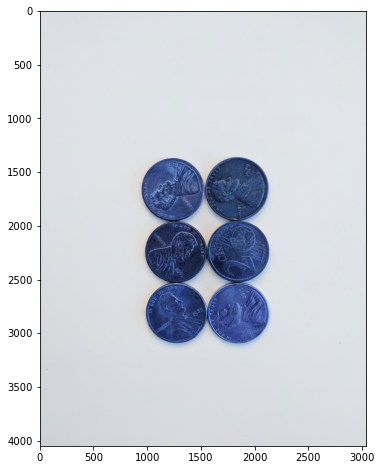

In [3]:
# read original image
coin = cv2.imread(r'C:\Users\Data\computer vision\pennies.jpg')

display(coin)

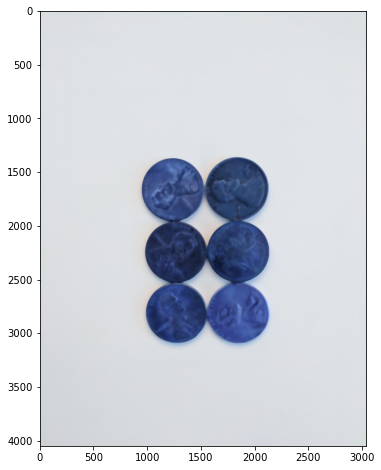

In [4]:
# mediaBlur
blur_coin = cv2.medianBlur(coin, 25)

display(blur_coin)

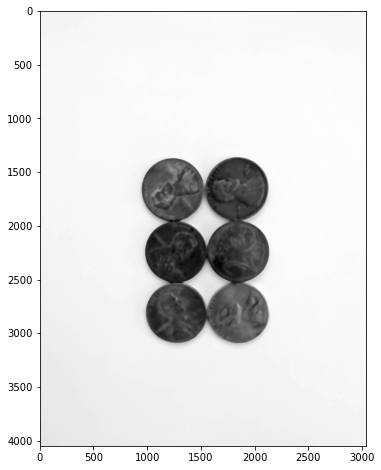

In [5]:
# grayscale
gray_coin = cv2.cvtColor(blur_coin, cv2.COLOR_BGR2GRAY)

display(gray_coin)

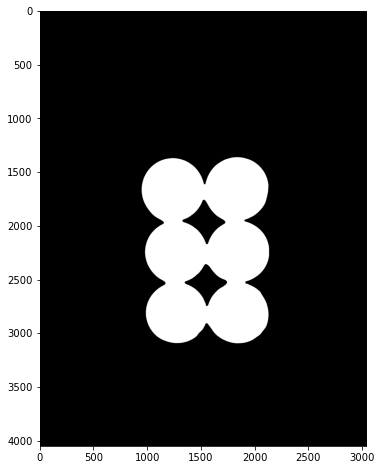

In [6]:
# threshold
ret, thresh = cv2.threshold(gray_coin, 160,255, cv2.THRESH_BINARY_INV)

display(thresh)

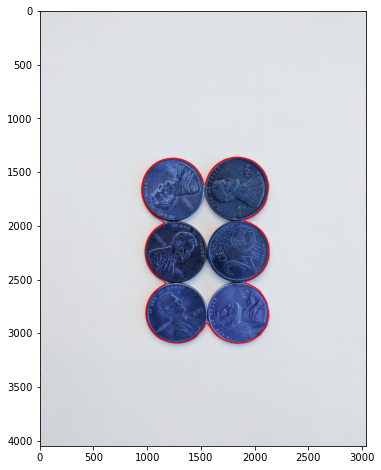

In [7]:
# contours
contours, hierarchy = cv2.findContours(thresh.copy(), cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

for i in range(len(contours)):
    if hierarchy[0][i][3] ==-1:
        cv2.drawContours(coin, contours, i, 255, 10)
        
display(coin, cmap='gray')

_______
________
# WaterShed Algorithm

## 1. read original image 

In [8]:
img = cv2.imread(r'C:\Users\Data\computer vision\pennies.jpg')

## 2. medianBlur

In [9]:
blur = cv2.medianBlur(img, 35)

## 3. grayscale

In [10]:
gray = cv2.cvtColor(blur, cv2.COLOR_BGR2GRAY)

## 4. threshold

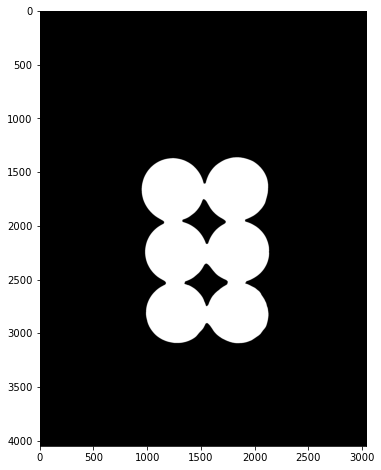

In [11]:
ret, thresh = cv2.threshold(gray,0, 255, cv2.THRESH_BINARY_INV +  cv2.THRESH_OTSU)

display(thresh)

## 5. Optional Noise Removal

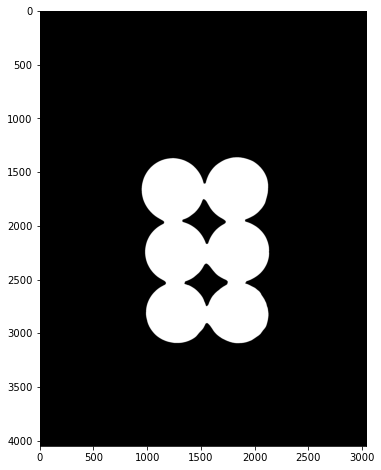

In [12]:
kernel = np.ones((3,3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations= 2)

display(opening, cmap='gray')

## 6. Grab Background sure of

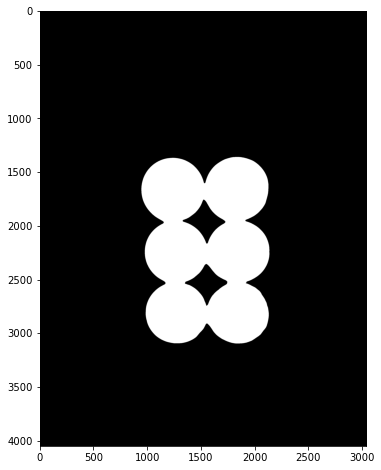

In [13]:
sure_bg = cv2.dilate(opening, kernel, iterations = 3)

display(sure_bg)

## 7. Find sure Foreground

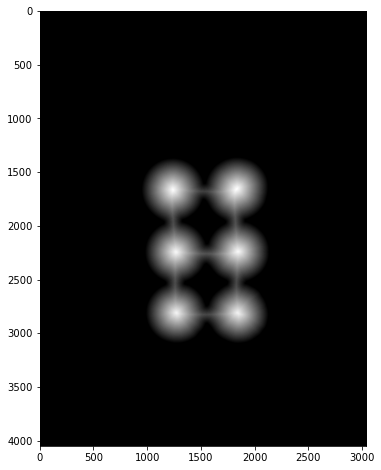

In [14]:
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)

display(dist_transform)

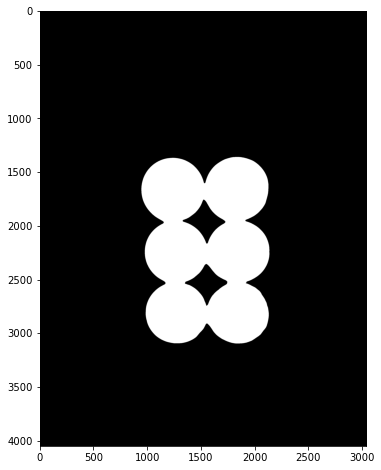

In [15]:
ret, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

display(sure_bg)

## 8. find Unknown region

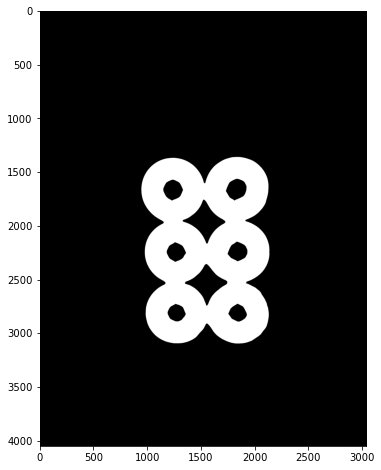

In [16]:
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

display(unknown, cmap='gray')

## 9. Labe markers of sure foreground

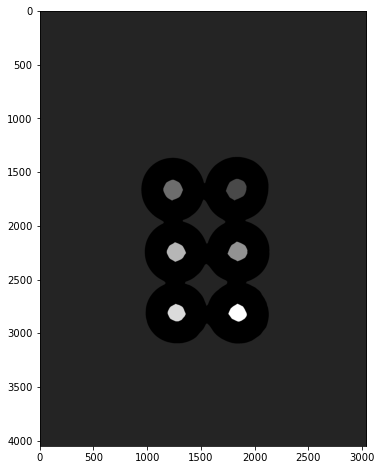

In [17]:
# marker label
ret, markers = cv2.connectedComponents(sure_fg)

# add one to all labels so that sure background is not 0 but 1
markers += 1

markers[unknown ==255] = 0 # removing unknown black part


display(markers)

## 10. apply waterShed

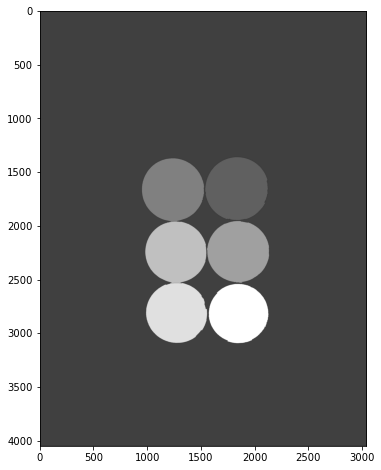

In [18]:
markers = cv2.watershed(img, markers)

display(markers)

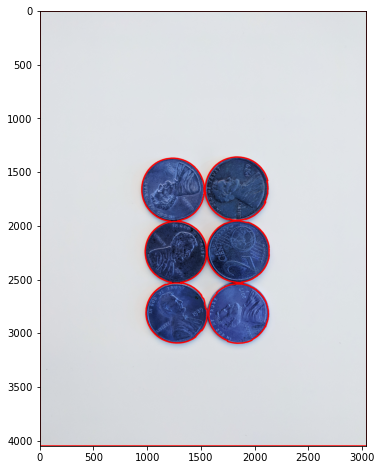

In [19]:
# contour 

contours, hierarchy = cv2.findContours(markers.copy(), cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

for i in range(len(contours)):
    if hierarchy[0][i][3] == -1:
        cv2.drawContours(img, contours, i, 255, 10)
        
display(img, cmap='gray')

______
____
# Costom seeds with waterShed Algorithm

In [20]:
img= cv2.imread(r'C:\Users\Data\computer vision\road_image.jpg')
img_copy = img.copy()

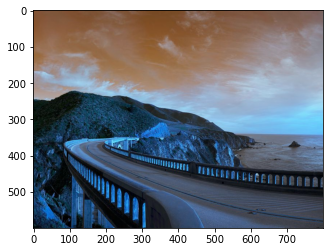

In [21]:
plt.imshow(img)

In [22]:
img.shape

(600, 800, 3)

In [23]:
# get dimetion
img.shape[:2]

(600, 800)

In [24]:
marker_image= np.zeros(img.shape[:2],np.int32)

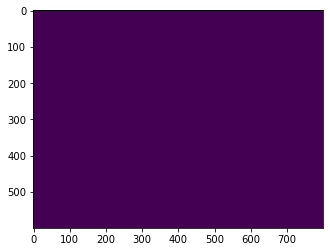

In [25]:
plt.imshow(marker_image)

In [26]:
segments = np.zeros(img.shape, np.uint8)

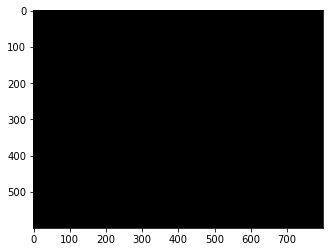

In [27]:
plt.imshow(segments)

In [28]:
segments.shape

(600, 800, 3)

### Create Color maker

In [29]:
from matplotlib import cm

In [30]:
cm.tab10

In [31]:
len(cm.tab10.colors)

10

In [32]:
cm.tab10(0) # return RGB and alpa (scale between 0 and 1)

(0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0)

In [33]:
cm.tab10(0)[0:3] # slice RGB only

(0.12156862745098039, 0.4666666666666667, 0.7058823529411765)

In [34]:
cm.tab10(0)[:3]  

(0.12156862745098039, 0.4666666666666667, 0.7058823529411765)

In [35]:
np.array(cm.tab10(0)[:3]) *255 # scale it range [0,255]

array([ 31., 119., 180.])

In [36]:
tuple(np.array(cm.tab10(0)[:3])*255) # convert it to a tuple

(31.0, 119.0, 180.0)

In [37]:
def create_rgb(i):
    return tuple(np.array(cm.tab10(i)[:3])*255)

In [38]:
colors = []

for i in range(len(cm.tab10.colors)):
    colors.append(create_rgb(i))
    
colors

[(31.0, 119.0, 180.0),
 (255.0, 127.0, 14.0),
 (44.0, 160.0, 44.0),
 (214.0, 39.0, 40.0),
 (148.0, 103.0, 189.0),
 (140.0, 86.0, 75.0),
 (227.0, 119.0, 194.0),
 (127.0, 127.0, 127.0),
 (188.0, 189.0, 34.0),
 (23.0, 190.0, 207.0)]

In [39]:
len(colors)

10

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread(r'C:\Users\Data\computer vision\road_image.jpg')
img = cv2.resize(img, (500, 500))
img_copy = img.copy()

# set marker
marker_image = np.zeros(img.shape[:2], dtype= np.int32)
segments = np.zeros(img.shape, dtype = np.uint8)

# set color 
from matplotlib import cm

def create_rgb(i):
    return tuple(np.array(cm.tab10(i)[:3])*255)

colors = []
for i in range(len(cm.tab10.colors)):
    colors.append(create_rgb(i))
    
    
# set maerker
n_marker = len(colors)
current_marker = 1
marker_update = False


# function callback
def mouse_callback(event, x,y, flags, params):
    global marker_update
    
    if event == cv2.EVENT_LBUTTONDOWN:
        # marker passed to watershed algorithm
        cv2.circle(marker_image,(x,y),10,(current_marker), -1)
        # use sees on image
        cv2.circle(img_copy, (x,y), 10, colors[current_marker], -1)
        
        marker_update = True
    pass
        
cv2.namedWindow('Road image')
cv2.setMouseCallback('Road image',mouse_callback)


while True:
    cv2.imshow('Watershed Segments', segments)
    cv2.imshow('Road image',img_copy)
    
    # close all window
    k =cv2.waitKey(0)
    if k == 27:
        break
        
        
    # clearing all color (user press c key)
    elif k == ord('c'):
        img_copy = img.copy()
        marker_image = np.zeros(img.shape[:2], dtype=np.int32)
        segments = np.zeros(img.shape, dtype= np.uint8)
        
    # update colors
    elif k > 0 and chr(k).isdigit():
        current_marker = int(chr(k))
        
    # update marker
    if marker_update:
        marker_image_copy = marker_image.copy()
        cv2.watershed(img, marker_image_copy)
        
        segments = np.zeros(img.shape, dtype=np.uint8)
        
        
        for color_ind in range(n_marker):
            segments[marker_image_copy == (color_ind)] = colors[color_ind]
            
cv2.destroyAllWindows()